In [42]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

image_path = 'copy.png'

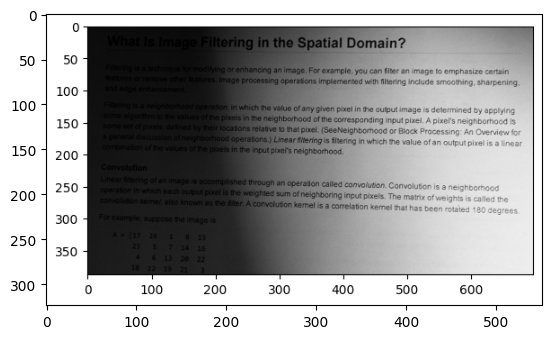

In [43]:
image = cv2.imread(image_path)
plt.imshow(image)

In [44]:
# 이진화 : 흑백 채널로 변경 [0, 255] -> [0, 1]
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

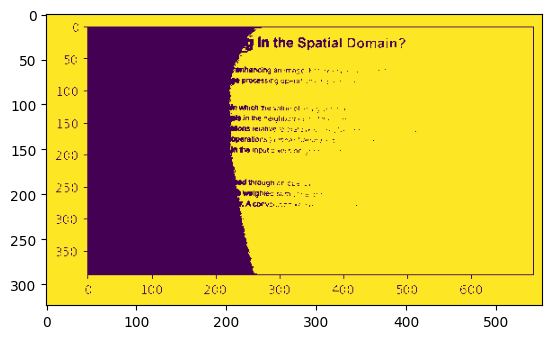

In [45]:
# 임계값 (threshold)
# pixel < 50 : 검정
# pixel > 50 : 흰
result, binary = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
plt.imshow(binary)

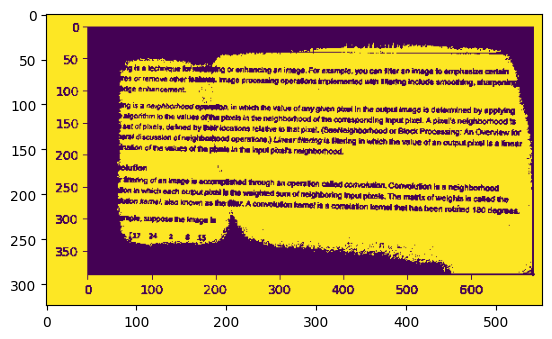

In [46]:
# 적응형 이진화
# 데이터에 따라 threshold 설정 기능
# 영역(region)마다 임계값 설정
# -> 밝기 변화가 심한 이미지에 유용
binary_ad = cv2.adaptiveThreshold(
    gray,                           # 적응 이미지
    255,                            # 최대값
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, # 판단기준, 가우시안(옵션)
    cv2.THRESH_BINARY,              # 조건(threshold)
    121,                            # kernel (블록크기, 주변영역 크기)
    4                               # 상수 C (평균/가중평균에서 빼는 값)
)
plt.imshow(binary_ad)
# 코드 실행과정
# kernel (121*121) -> 주변 픽셀 가져옴
# cv2.ADAPTIVE_THRESH_GAUSSIAN_C (옵션)
# 상수 -> 평균값 - 상수 -> threshold T 로 사용
# 0, 255 이진화()

# 추가설명
# 상수 클수록 threshold 낮아짐, 더 밝게 잡힘
# 로봇 라인트레이싱, OCR, 자동차번호판 임식

In [47]:
# from google.colab.patches import cv2_imshow

ret, binary_global = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
binary_ad = cv2.adaptiveThreshold(gray, 255,
                                  cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY, 121, 4)
# cv2_imshow(binary_global) # 검은 부분 생기거나 깨짐
# cv2_imshow(binary_ad)     # 글자/라인이 선명함


엣지 검출

In [48]:
# 소벨 필터
# 1차 미분, slope(gradient)
# gradient : 밝기 변화량 계산 >> 물체 윤곽선(contour), 경계(edge) 추출필터
# 밝기 급변 >> edge(경계)
# 밝기 변화X >> 배경
# >> 경계의 방향과 강도 계산

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [49]:
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [50]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], shape=(324, 552), dtype=uint8)

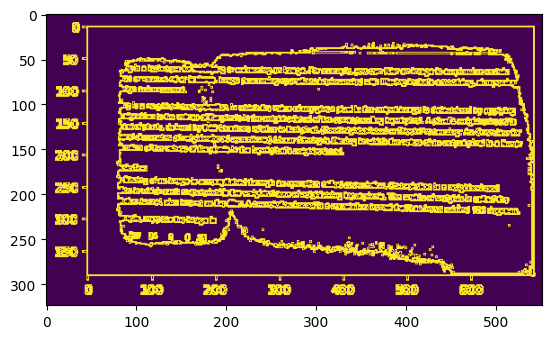

In [51]:
# 소벨 필터
# 1, 0 >> 수평 엣지, / 0, 1 >> 수직 엣지
gx = cv2.Sobel(binary_ad, cv2.CV_32F, 1, 0, ksize=3)
gy = cv2.Sobel(binary_ad, cv2.CV_32F, 0, 1, ksize=3)

# 코드설명
# gx : x방향 (가로) 변화감지 >> 세로찾기
#       dx = 1 : x축 방향으로 미분
#       dy = 0 : y축 방향으로 미분X
# gy : y방향 (세로) 변화감지 >> 가로찾기
#       dy = 1 : y축 방향으로 미분
# binary_ad : 적응형 이진화 거친 이미지 가져옴
# cv2.CV_32F : 32 비트 실수형(음수 포함 -> 정밀계산)
# <> uint8 (일반 이미지) : OpenCV, matplotlib에서 활용(픽셀범위 0~255)

# 엣지 강도추출
mag = cv2.magnitude(gx, gy) # 강도 계산. 피타고라스 정리 활용
# l2 norm
# sqrt(gx^2 + gy^2)
# 이미지로 표현
mag = np.uint8(np.clip(mag,0,255))
plt.imshow(mag)

In [52]:
print(image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


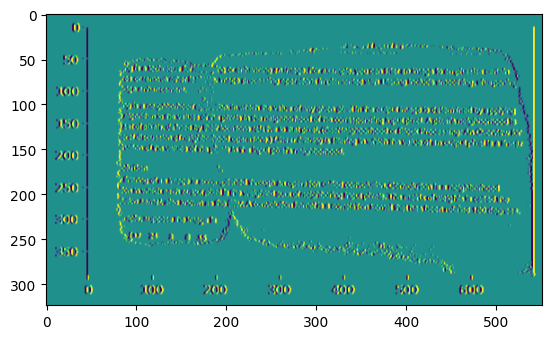

In [53]:
plt.imshow(gx)

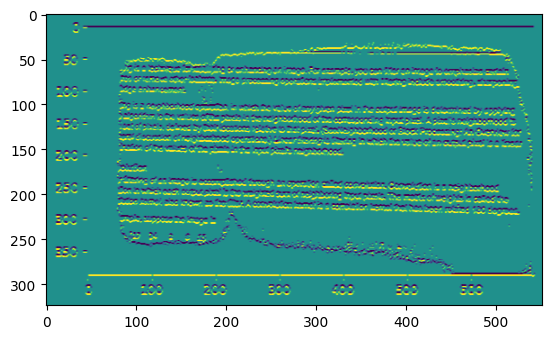

In [54]:
plt.imshow(gy)

Canny 필터

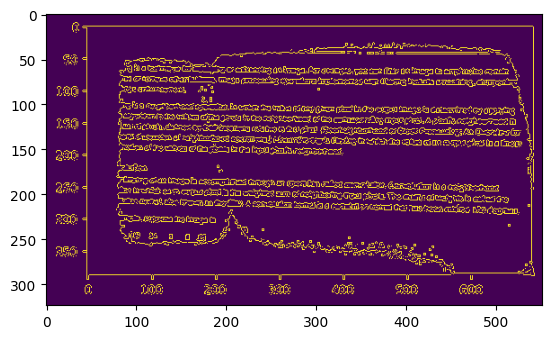

In [55]:
# cv2.Canny(이미지, 낮은 임계값, 높은 임계값)
canny = cv2.Canny(binary_ad, 30, 200)
plt.imshow(canny)

# binary_ad까지 3단계
# 낮은 임계값(약한 엣지)
# 높은 임계값(강한 엣지)
# 중간값(강한 엣지와 연결되면 살림)
# 더블 임계치

# binary_ad
# 1) 이미지 불러와서 이진화
# 2) 적응형 임계값(threshold)
# 3) 끝. 2번까지 진행. 전처리 과정

- 노이즈 제거(Gaussian Blur)
- 그레디언트 계산(Sobel Filter)
- 비최대 억제(Non-Maximum Suppression) → IoU
    - 엣지 방향따라 로컬의 최대값만 남기고 나머지 억제
- 이중 임계값 처리(Double Thresholding)
    - 강한 엣지, 약한 엣지로 구분
    - 연결성 검사(약한 엣지는 강한 엣지와 연결될 때에만 보존)
- 강한 엣지와 연결되지 않은 약한 엣지 제거

코너(모서리) 검출 알고리즘
- 해리스코너(코너) 알고리즘
- 시-토마스 알고리즘

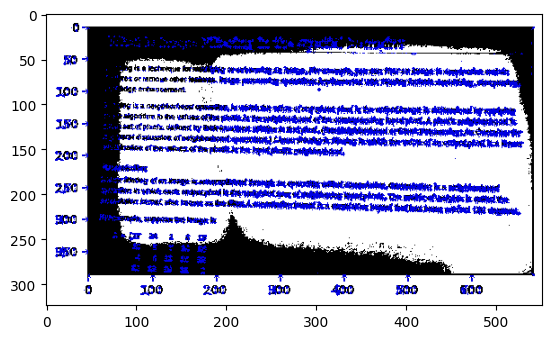

In [56]:
# 해리스 코너 검출기 -> 모서리 찾기
# 윈도우를 모든 방향으로 움직일 때, 픽셀값의 변화가 가장 큰 지점을 코너로 생각
# cv2.cornerHarris(이미지, 필터 대상영역, 커널, 임계치)
harris = cv2.cornerHarris(np.float32(gray), blockSize=2, ksize=3, k=0.04)

# 코너(모서리) : edge 교차점
# -> 두 방향으로 모두 강한 밝기 변화량 존재
# -> 엣지가 강한 지점 추출(특징점 추출)
# -> 점수맵(score map) 생성하여 결정
# 영상 정합, 로봇 SLAM에서도 경로 찾기

# float 변환 : gradient 계산(미분) uint8 -> float32
# blocksize : 한 번에 검사할 범위(이웃범위 크기)
# -> 값이 클수록 넓은 영역 검사
# -> 큰 코너에 민감

# ksize : 소벨필터(<> 단순필터X)
# -> 평균 구할 영역크기 (홀수만 가능)

# k :threshold. 클수록 민감하게 반응

harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U).astype(np.uint8)
# 결과는 0-255 범위 정규화
# -> (float -> uint8)
# 코너의 강도값을 사람이 보기 쉽게 시각화
# 왜? 점수맵(score map) 때문에(값 범위가 매우 크거나 음수가 될 수 있다)
# harris_norm = (harris - min(harris)) / (max(harris)) - min(harris)) * 255

corner = cv2.cvtColor(binary_ad, cv2.COLOR_BGR2RGB)
corner[harris > 0.9*harris_norm.max()] = (0,0,225)
# 상위 10% 강한 코너만 빨간색(RGB면 파란색) 표시
plt.imshow(corner)

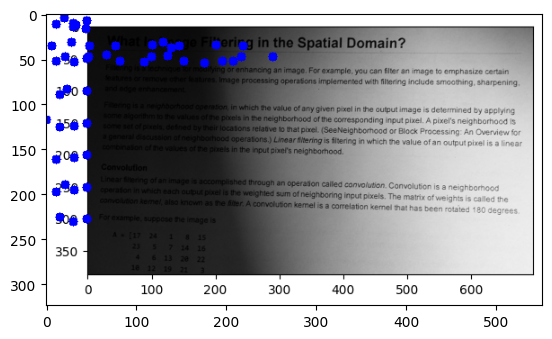

In [57]:
# 흑백변환 >> 알고리즘 적용 >> 시각화
src = cv2.imread(image_path)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# 알고리즘 적용 : goodFeaturesToTrack
# 추적하기 좋은 특징점
pts = cv2.goodFeaturesToTrack(
    gray,
    maxCorners=50,          # 최대 50개 특징점
    qualityLevel=0.01,      # 상위 1%만
    minDistance=10          # 특징점간 간격 10px
)

if pts is not None:
    pts = pts.astype(np.uint8)
    for pt in pts:
        x, y = pt.ravel() # 2차원 배열을 1차원으로 변형
        cv2.circle(image, (x, y), 5, (0, 0, 255), -1)
plt.imshow(image)

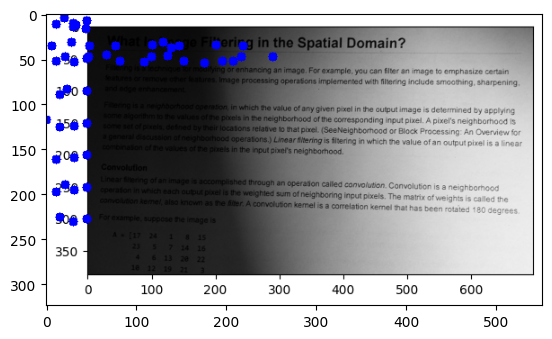

In [58]:
# 테스트

# 흑백변환 >> 알고리즘 적용 >> 시각화
src = cv2.imread(image_path)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# 알고리즘 적용 : goodFeaturesToTrack

# 추적하기 좋은 특징점
pts = cv2.goodFeaturesToTrack(
    gray,
    maxCorners=50,          # 최대 50개 특징점
    qualityLevel=0.01,      # 상위 1%만
    minDistance=10          # 특징점간 간격 10px
)

if pts is not None:
    pts = pts.astype(np.uint8)
    for pt in pts:
        x, y = pt.ravel() # 2차원 배열을 1차원으로 변형
        cv2.circle(image, (int(x), int(y)), 5, (0, 0, 255), -1)

plt.imshow(image)

In [59]:
pts.shape

(50, 1, 2)

In [60]:
pts

array([[[ 45,  50]],

       [[ 45,  86]],

       [[ 45, 122]],

       [[ 45, 157]],

       [[176,  55]],

       [[ 11, 198]],

       [[ 11, 162]],

       [[ 45, 193]],

       [[ 45, 228]],

       [[ 45,   8]],

       [[118,  35]],

       [[ 67,  46]],

       [[189,  35]],

       [[109,  54]],

       [[ 15, 126]],

       [[ 15,  90]],

       [[ 30,  15]],

       [[219,  36]],

       [[148,  36]],

       [[ 77,  36]],

       [[  6,  36]],

       [[ 48,  36]],

       [[ 44,  17]],

       [[ 20,   5]],

       [[ 21, 190]],

       [[208,  53]],

       [[ 47,  48]],

       [[ 33,  13]],

       [[135,  47]],

       [[ 21,  48]],

       [[ 28,  32]],

       [[217,  48]],

       [[117,  48]],

       [[ 23,  84]],

       [[252,  48]],

       [[ 15, 226]],

       [[153,  53]],

       [[ 82,  53]],

       [[ 11,  53]],

       [[196,  53]],

       [[ 30,  11]],

       [[ 30, 231]],

       [[ 31, 196]],

       [[ 31, 160]],

       [[ 31,  54]],

       [[ 

허프변환(Hough Transform)
- 직선 검출가능
- 원 검출가능

In [61]:
image_path = 'water_coins.jpg'

In [62]:
# np.around 반올림
np.around(1.54).astype(np.int8)

np.int8(2)

In [63]:
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray

array([[234, 239, 242, ..., 249, 250, 250],
       [234, 239, 242, ..., 250, 250, 251],
       [234, 239, 242, ..., 250, 250, 251],
       ...,
       [212, 231, 232, ..., 246, 246, 246],
       [206, 225, 227, ..., 245, 245, 245],
       [200, 219, 222, ..., 244, 244, 244]], shape=(312, 252), dtype=uint8)

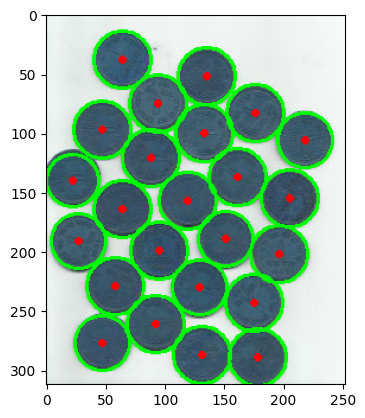

In [64]:
import numpy as np
import cv2

# 원 검출
circles = cv2.HoughCircles(gray,
                 cv2.HOUGH_GRADIENT,    # 기울기 사용 원 찾음
                 dp=1.2,                # 해상도 스케일링 비율
                                        # 1.0 입력 이미지와 같은 해상도
                                        # (값이 크면 속도 빨라짐, 속도 느려짐)
                 minDist=30,           # 검출된 원(중심) 사이 최소거리
                                        # 원 중심 간격이 30이하, 중복 아니다
                                        # canny edge upper threshold
                 param1=100,            # 높은 임계값
                 param2=30,             # 투표(voting) 누적 임계값(원으로 판단)
                                        # 값이 높을수록 확실한 원만 검출
                 minRadius=10,          # 최소 반지름
                 maxRadius=50           # 최대 반지름
                 )

# 투표(voting)
if circles is not None:
    circles = np.around(circles).astype(np.int16)
    for (x, y, r) in circles[0, :]:
        # 배열의 첫 번째 차원 무시
        # 검출된 원 정보만 선택
        # 첫 번째 차원은 항상 크기가 1 (배치가 1인 것과 유사)
        # circle.shape (1, N, 3)
        # 원의 중심, 원의 중심 y좌표, 원의 반지름
        cv2.circle(image, (x,y), r, (0,255,0), 2) # BGR
        cv2.circle(image, (x,y), 2, (255,0,0), 2)

plt.imshow(image)

# minDist : 검출된 원 사이 최소거리
# 과잉검출 방지

In [65]:
gray

array([[234, 239, 242, ..., 249, 250, 250],
       [234, 239, 242, ..., 250, 250, 251],
       [234, 239, 242, ..., 250, 250, 251],
       ...,
       [212, 231, 232, ..., 246, 246, 246],
       [206, 225, 227, ..., 245, 245, 245],
       [200, 219, 222, ..., 244, 244, 244]], shape=(312, 252), dtype=uint8)

In [66]:
# 캐니엣지 검출
edges = cv2.Canny(gray, 50, 150)
edges

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(312, 252), dtype=uint8)

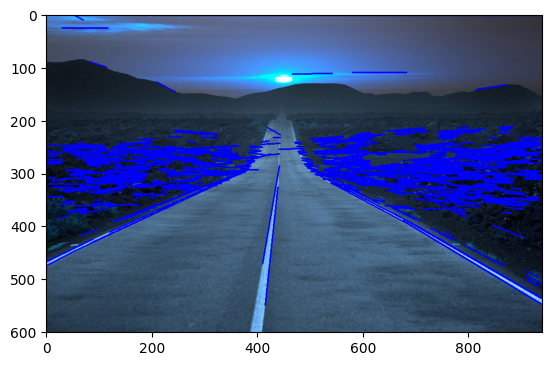

In [67]:
image = cv2.imread('lines.png')

#흑백 변환 -> 엣지 검출 -> 직선 검출
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#캐니 엣지 검출
edges = cv2.Canny(gray, 50, 150)

#확률적 직선 검출
lines = cv2.HoughLinesP(edges,  #엣지의 모음
                rho=1,          #해상도
                theta=np.pi/180,#해상도(각도)
                threshold=100,  #직선으로 간주될 수 있는 최소값
                minLineLength=10, #내가 검출하려는 직선의 최소 길이
                maxLineGap=10) #직선으로 간주되는 간격

#시각화
if lines is not None:
  for line in lines :
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(image)

ρ = x*cos (θ) + y*sin (θ)

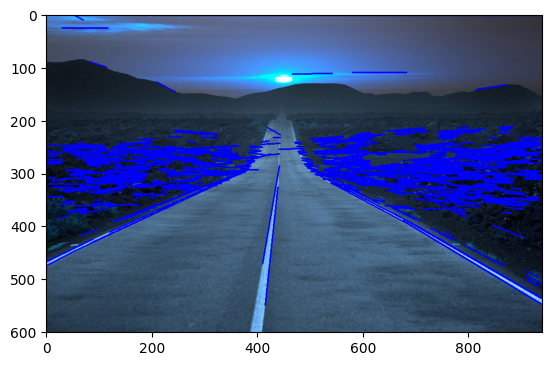

In [68]:
# 확률적 직선으로 검출 (윤곽선 검출, contour)
# cv2.HoughLines 무한직선
# >> 실제 길이 선분 형태로 반환(실무)
lines = cv2.HoughLinesP(
    edges,            # 엣지 모음. 대부분 canny 엣지맵 사용
    rho=1,            # rho. 해상도(거리 해상도. 1px)
    theta=np.pi/180,  # theta. 해상도(각도의 해상도. 1도)
    threshold = 100,  # 직선간주 최소값(최소 투표수 100)
    minLineLength=10, # 내가 검출하려는 직선의 최소길이
    maxLineGap=10      # 직선간의 최대 허용 간격
    )

# rho. 원점(0,0)에서 직선까지
# theta. 각도(radian) / np.pi/180=1도(degree)
# 각도 >> resolution 크면 직선 검출 정확도 떨어짐
# >> 누적 투표수가 100 이상이여야 선이라 간주
# >> 점수가 높아질수록 확실한 직선이 검출되니까 노이즈 감소, 낮추면 작은 선도 검출
# minLine은 직선의 최소길이
# maxLineGap은 중간에 끊어진 선 사이 간격이 10 이하면 연결된 하나의 선으로 간주

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1,y1), (x2,y2), (0,0,255), 2)

plt.imshow(image)

컨투어(contour, 윤곽선) 검출

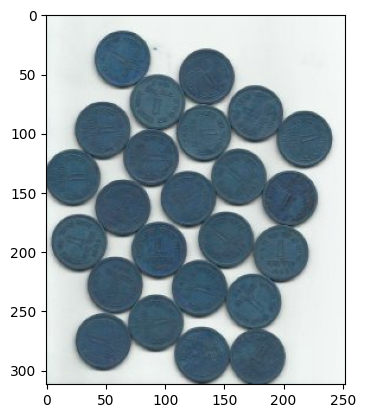

In [69]:
image = cv2.imread('water_coins.jpg')
plt.imshow(image)

OTSU : 자동으로 최적 임계값 찾기
- grayscale image >> 이진화
- 히스토그램(픽셀값 분포) 자동분석
- 임계값 찾기 -> 이미지 내부에서 흑(0), 백(255) 나눔

In [ ]:
# 흑백 -> 임계값으로 컨투어(윤곽선) 검출
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 임계값 적용
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
# '_' : threshold. OTSU가 최적값 계산

In [ ]:
#컨투어 검출
#cv2.RETR_EXTERNAL 윤곽선을 찾는 방법 -> 리스트(목록)을 검색(모든 윤곽선 찾기)
#cv2.CHAIN_APPROX_SIMPLE 윤곽선을 '저장하는 방법' -> 모든 점 저장
cons = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# 흰색255 영역 경계선 찾아 저장
print(cons) # [contour, hierarchy]
# hierarchy : 윤곽선의 계층 구조
# >> 윤곽선들 간 포함관계. [1, N, 4] 이며, 1은 윤곽선, N은 윤곽선의 인덱스, 4는 윤곽선의 계층 구조
# >> 윤곽선마다 [next, prev, first_child, parent]로 구성
# >> next : 현재 윤곽선의 다음 윤곽선, 
# prev : 현재 윤곽선의 이전 윤곽선, 
# first_child : 현재 윤곽선의 첫번째 자식 윤곽선,
# parent : 현재 윤곽선의 부모 윤곽선

((array([[[153, 299]],

       [[152, 300]],

       [[151, 301]],

       [[150, 302]],

       [[149, 303]],

       [[149, 304]],

       [[148, 305]],

       [[147, 306]],

       [[146, 307]],

       [[145, 308]],

       [[144, 308]],

       [[143, 309]],

       [[142, 310]],

       [[141, 310]],

       [[140, 311]],

       [[139, 311]],

       [[138, 311]],

       [[139, 311]],

       [[140, 311]],

       [[141, 311]],

       [[142, 311]],

       [[143, 311]],

       [[144, 311]],

       [[145, 311]],

       [[146, 311]],

       [[147, 311]],

       [[148, 311]],

       [[149, 311]],

       [[150, 311]],

       [[151, 311]],

       [[152, 311]],

       [[153, 311]],

       [[154, 311]],

       [[155, 311]],

       [[156, 311]],

       [[157, 311]],

       [[158, 311]],

       [[159, 311]],

       [[160, 311]],

       [[161, 311]],

       [[162, 311]],

       [[163, 311]],

       [[164, 311]],

       [[165, 311]],

       [[166, 311]],

       [

윤곽선 검색방식(contour retrieval mode)
- cv2.RETR_LIST: 모든 윤곽선 검색
- cv2.RETR_EXTERNAL: 외곽선 검색
- cv2.RETR_CCOMP: 계층 구조 검색
- cv2.RETR_TREE: 계층 구조 검색

윤곽선 압축 방법(approximation method)
- cv2.CHAIN_APPROX_NONE
  - 윤곽선의 모든 점을 전부 저장
- cv2.CHAIN_APPROX_SIMPLE
  - 꼭 필요한 점만 저장

In [ ]:
# 검출된 윤곽선, 계층구조가 cons에 포함되어 있는지 검사
# 버전 상관없이 만능코드
con_packs = cons[0] if len(cons) == 2 else cons[1]
print(con_packs) # contour, hieracy

(array([[[153, 299]],

       [[152, 300]],

       [[151, 301]],

       [[150, 302]],

       [[149, 303]],

       [[149, 304]],

       [[148, 305]],

       [[147, 306]],

       [[146, 307]],

       [[145, 308]],

       [[144, 308]],

       [[143, 309]],

       [[142, 310]],

       [[141, 310]],

       [[140, 311]],

       [[139, 311]],

       [[138, 311]],

       [[139, 311]],

       [[140, 311]],

       [[141, 311]],

       [[142, 311]],

       [[143, 311]],

       [[144, 311]],

       [[145, 311]],

       [[146, 311]],

       [[147, 311]],

       [[148, 311]],

       [[149, 311]],

       [[150, 311]],

       [[151, 311]],

       [[152, 311]],

       [[153, 311]],

       [[154, 311]],

       [[155, 311]],

       [[156, 311]],

       [[157, 311]],

       [[158, 311]],

       [[159, 311]],

       [[160, 311]],

       [[161, 311]],

       [[162, 311]],

       [[163, 311]],

       [[164, 311]],

       [[165, 311]],

       [[166, 311]],

       [[

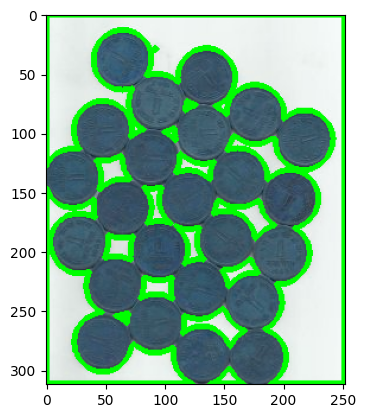

In [75]:
#시각화
cv2.drawContours(image, con_packs, -1, (0, 255, 0), 3)
plt.imshow(image)

In [ ]:
import cv2

print(cv2.__version__)

# openCV 3.X : contours, hierarchy (윤곽선 리스트, 계층)
# openCV 4.X : contours (윤곽선 리스트)

4.12.0
